# exp_trial_002 EP update >= 4 エントリ、損切 Hyper 200、利確なし 集計

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import os
import re

import numpy as np
import pandas as pd
from matplotlib import (
    font_manager as fm,
    pyplot as plt,
)
import seaborn as sns

from funcs.common import add_data_af

In [3]:
name_doe = 'exp_trial_003_mm_epupd_0'
dir_path = '../doe/%s' % name_doe
list_date = sorted(
    [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]
)
print(list_date)

['2025-03-19', '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-31', '2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-14', '2025-04-15', '2025-04-16', '2025-04-17', '2025-04-18', '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24', '2025-04-25', '2025-04-28', '2025-04-30', '2025-05-01', '2025-05-02', '2025-05-07', '2025-05-08', '2025-05-09']


In [4]:
pattern = re.compile(r'summary.*_([0-9a-z]{4}).*\.html')
df_7011 = pd.DataFrame()
df_7203 = pd.DataFrame()
df_8306 = pd.DataFrame()

dict_html = dict()

for date in list_date:
    print(date)
    for f in sorted(os.listdir(os.path.join(dir_path, date))):
        m = pattern.match(f)
        if m:
            code = m.group(1)
            dict_html[code] = f

    for code in dict_html.keys():
        tbl = pd.read_html(os.path.join(dir_path, date, dict_html[code]))
        if code == '7011':
            add_data_af(df_7011, tbl[0], date)
        elif code == '7203':
            add_data_af(df_7203, tbl[0], date)
        elif code == '8306':
            add_data_af(df_8306, tbl[0], date)
        else:
            pass

#print(df_7011)
#print(df_7203)
#print(df_8306)

2025-03-19
2025-03-21
2025-03-24
2025-03-25
2025-03-26
2025-03-27
2025-03-28
2025-03-31
2025-04-01
2025-04-02
2025-04-03
2025-04-04
2025-04-07
2025-04-08
2025-04-09
2025-04-10
2025-04-11
2025-04-14
2025-04-15
2025-04-16
2025-04-17
2025-04-18
2025-04-21
2025-04-22
2025-04-23
2025-04-24
2025-04-25
2025-04-28
2025-04-30
2025-05-01
2025-05-02
2025-05-07
2025-05-08
2025-05-09


In [5]:
df_sum = pd.DataFrame()
df_sum['af_init'] = df_7011['af_init']
df_sum['af_step'] = df_7011['af_step']
df_sum['af_max'] = df_7011['af_max']
df_sum

,af_init,af_step,af_max
0,0.00001,0.00001,0.001
1,0.00002,0.00002,0.002
2,0.00003,0.00003,0.003
3,0.00004,0.00004,0.004
4,0.00005,0.00005,0.005
5,0.00006,0.00006,0.006
6,0.00007,0.00007,0.007
7,0.00008,0.00008,0.008
8,0.00009,0.00009,0.009
9,0.00010,0.00010,0.010


## AF step vs. Profit (total)

In [6]:
df_sum['7011'] = df_7011.sum(axis=1)
df_sum['7203'] = df_7203.sum(axis=1)
df_sum['8306'] = df_8306.sum(axis=1)
df_sum

,af_init,af_step,af_max,7011,7203,8306
0,0.00001,0.00001,0.001,36450.00102,7300.00102,9950.00102
1,0.00002,0.00002,0.002,28950.00204,33900.00204,-7299.99796
2,0.00003,0.00003,0.003,17600.00306,28600.00306,-17299.99694
3,0.00004,0.00004,0.004,9700.00408,15850.00408,-27699.99592
4,0.00005,0.00005,0.005,28800.00510,30250.00510,-23299.99490
5,0.00006,0.00006,0.006,31550.00612,20900.00612,-13849.99388
6,0.00007,0.00007,0.007,26600.00714,16800.00714,-16399.99286
7,0.00008,0.00008,0.008,16600.00816,34250.00816,-29099.99184
8,0.00009,0.00009,0.009,21650.00918,22250.00918,-12999.99082
9,0.00010,0.00010,0.010,12350.01020,10950.01020,-10699.98980


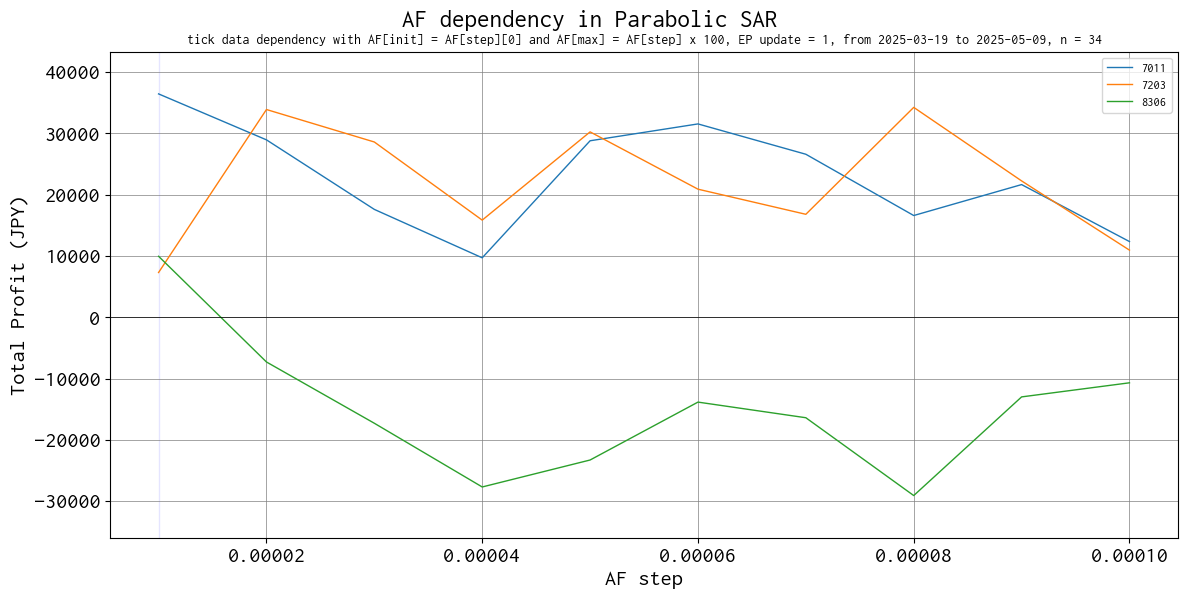

In [7]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

x = df_sum['af_step']
y = dict()
for i, code in enumerate(['7011', '7203', '8306']):
    y[i] = df_sum[code]
    ax.plot(x, y[i], label='%s' % code, lw=1)

threshold = 0
ax.fill_between(
    x, 0, 1,
    where=(y[0] > threshold) & (y[1] > threshold) & (y[2] > threshold),
    color='blue',
    alpha=0.1,
    transform=ax.get_xaxis_transform()
)

ax.axhline(0, color='black', lw=0.5)
#ax.set_xscale('log')
ax.grid(which='major', color='gray',linestyle='-', linewidth=0.5)
ax.grid(which='minor', color='gray',linestyle='dotted', linewidth=0.5)

ax.set_xlabel('AF step')
ax.set_ylabel('Total Profit (JPY)')
ax.legend(fontsize=9)

ax.set_title(
    'tick data dependency with AF[init] = AF[step][0] and AF[max] = AF[step] x 100, EP update = 1, from %s to %s, n = %d' % (
        list_date[0], list_date[len(list_date) - 1], len(list_date)
    ),
    fontsize=10
)

plt.suptitle('AF dependency in Parabolic SAR', fontsize=18)
plt.subplots_adjust(left=0.1, right=0.99, bottom=0.1, top=0.91)
plt.savefig('./%s/total.png' % name_doe)
plt.show()

## Seaborn 用にデータセットを準備

stack() を使わないのか？

https://note.nkmk.me/python-pandas-stack-unstack-pivot/

In [8]:
df = pd.DataFrame()
for code, df_code in zip(['7011', '7203', '8306'], [df_7011, df_7203, df_8306]):
    for date in list_date:
        for af_step in df_code['af_step']:
            profit = df_code[df_code['af_step'] == af_step][date].iloc[0]
            r = len(df)
            df.loc[r, 'af_step'] = af_step
            df.loc[r, 'code'] = code
            df.loc[r, 'date'] = date
            df.loc[r, 'profit'] = profit
df

,af_step,code,date,profit
0,0.00001,7011,2025-03-19,-5000.0
1,0.00002,7011,2025-03-19,-4850.0
2,0.00003,7011,2025-03-19,-4900.0
3,0.00004,7011,2025-03-19,-4500.0
4,0.00005,7011,2025-03-19,-3650.0
...,...,...,...,...
1015,0.00006,8306,2025-05-09,1050.0
1016,0.00007,8306,2025-05-09,2250.0
1017,0.00008,8306,2025-05-09,1200.0
1018,0.00009,8306,2025-05-09,2300.0


## Boxplot

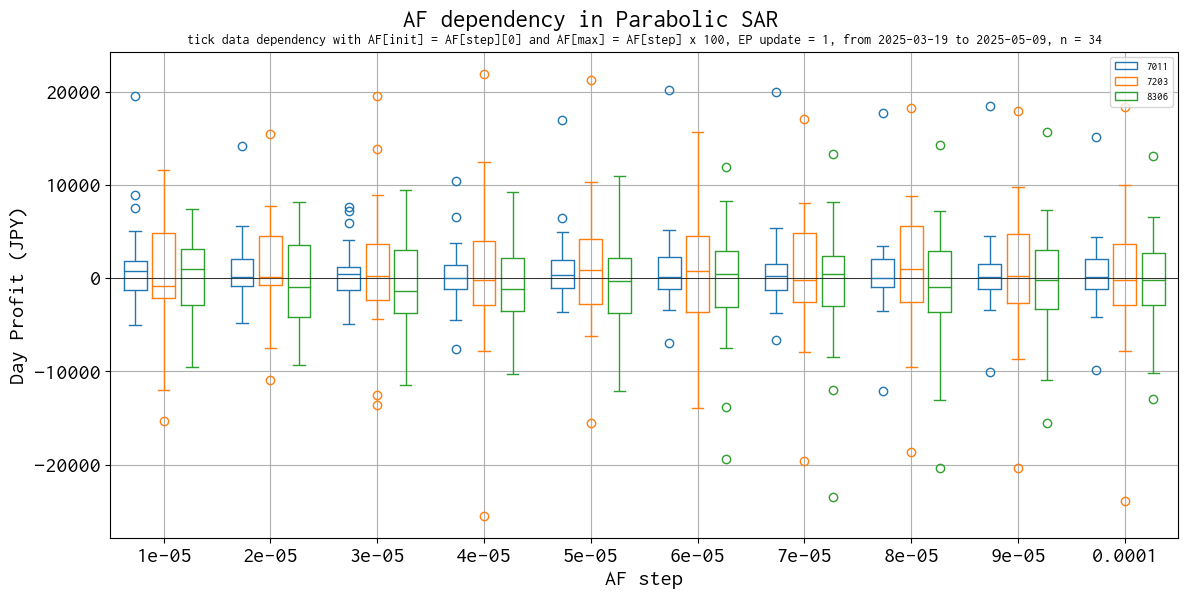

In [9]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

sns.boxplot(data=df, x='af_step', y='profit', hue='code', linewidth=1, fill=False, gap=.2, ax=ax)
ax.axhline(0, color='black', lw=0.5)
ax.set_xlabel('AF step')
ax.set_ylabel('Day Profit (JPY)')
ax.legend(fontsize=8)

ax.grid()

ax.set_title(
    'tick data dependency with AF[init] = AF[step][0] and AF[max] = AF[step] x 100, EP update = 1, from %s to %s, n = %d' % (
        list_date[0], list_date[len(list_date) - 1], len(list_date)
    ),
    fontsize=10
)

plt.suptitle('AF dependency in Parabolic SAR', fontsize=18)
plt.subplots_adjust(left=0.1, right=0.99, bottom=0.1, top=0.91)
plt.savefig('./%s/boxplot.png' % name_doe)
plt.show()